<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciencia y analítica de datos
## Ciencia y analítica de datos
### Regresiones y K means
## Profesor: PhD. María de la Paz Rico Fernández
## Profesor Tutor: Roberto Antonio Guevara González
### Bernardo Mijangos Flores
### Matricula A01793654

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [2]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 712 kB/s 
     |████████████████████████████████| 1.0 MB 54.5 MB/s 
     |████████████████████████████████| 1.7 MB 47.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 64.2 MB/s 
     |████████████████████████████████| 6.3 MB 44.1 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=58f2fd1143481796b1e657a764890c09cbfde68cd6ea4d30d08e553627e82e20
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=d52c4ba837190fae0f3352349e0e7c98034fc33dc74a7564664cfe4f1cb626d7
  Stored in directory: /root/.

In [26]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

from sklearn.cluster import KMeans

Importa la base de datos

In [4]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [35]:

df.head()


,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [7]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

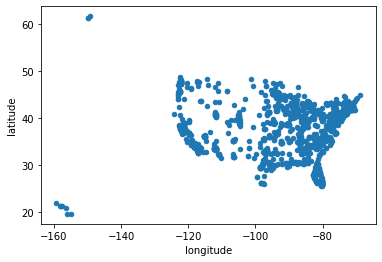

In [8]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [9]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [11]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [12]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [13]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

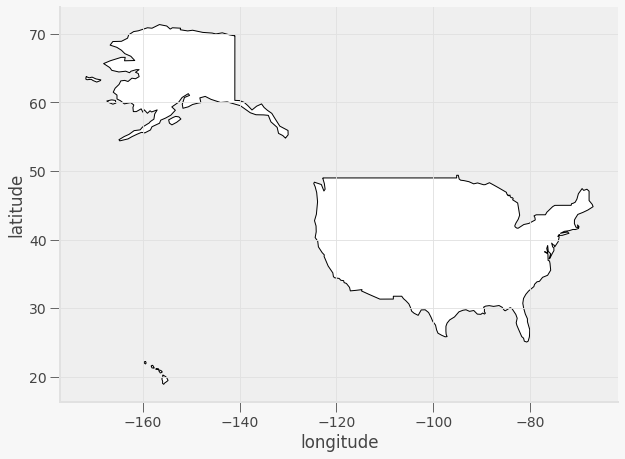

In [15]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

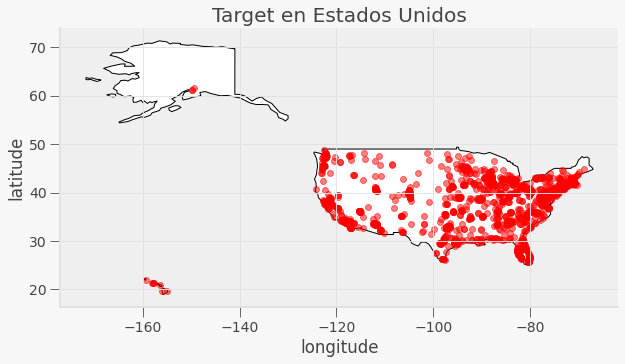

In [16]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [27]:
#tu codigo aquí

XKmeans = np.array(latlong.values.tolist())
XKmeans[0:5]

array([[ 33.2242254, -86.8041737],
       [ 33.3345501, -86.9897779],
       [ 30.6028747, -87.8959317],
       [ 34.5601477, -86.9715595],
       [ 31.2660613, -85.4464222]])

In [36]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

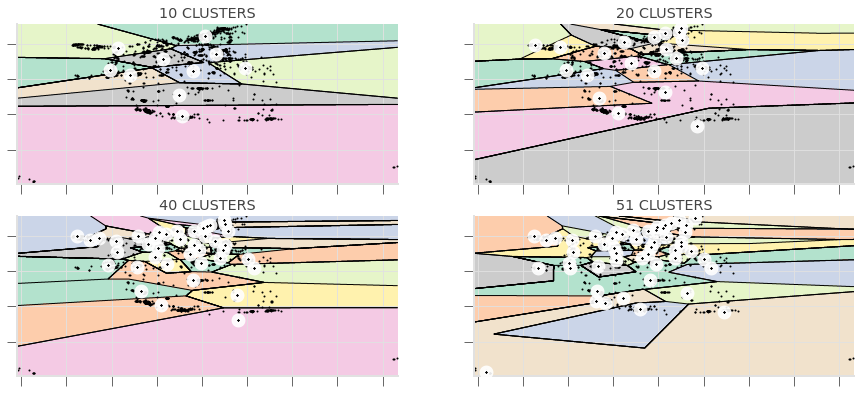

In [43]:
kmeans_iter1 = KMeans(n_clusters=10, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=20, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=40, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter4 = KMeans(n_clusters=51, init="random", n_init=1, max_iter=10,
                      random_state=5)
kmeans_iter1.fit(XKmeans)
kmeans_iter2.fit(XKmeans)
kmeans_iter3.fit(XKmeans)
kmeans_iter4.fit(XKmeans)

plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_iter1, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("10 CLUSTERS")


plt.subplot(322)
plot_decision_boundaries(kmeans_iter2, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("20 CLUSTERS")



plt.subplot(323)
plot_decision_boundaries(kmeans_iter3, XKmeans, show_centroids=False, show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("40 CLUSTERS")

plt.subplot(324)
plot_decision_boundaries(kmeans_iter4, XKmeans, show_centroids=False, show_ylabels=False,show_xlabels=False)
plot_centroids(kmeans_iter4.cluster_centers_)
plt.title("51 CLUSTERS")

plt.show()

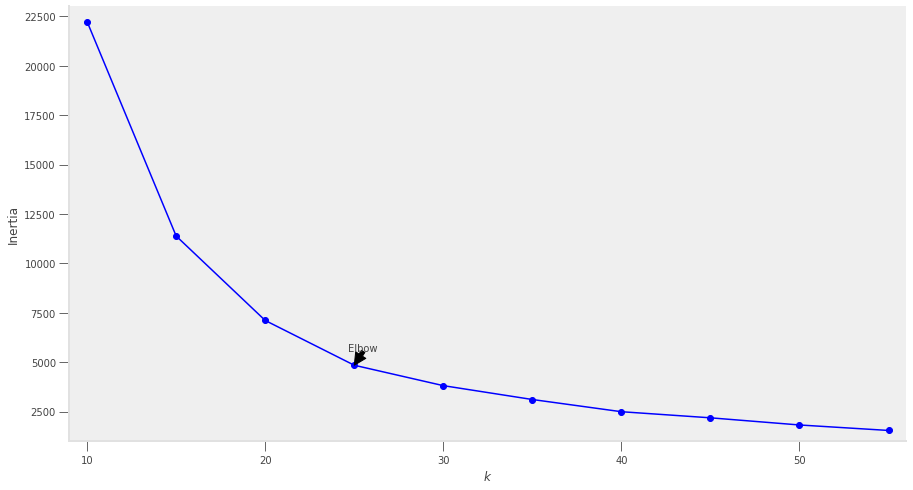

In [38]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(XKmeans)
                for k in range(10, 60, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]
l = [] 
for k in kmeans_per_k:
    l.append(k.n_clusters)

plt.figure(figsize=(15, 8))
plt.plot(l, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(25, inertias[3]), xytext=(25.5, 5550),
             arrowprops=dict(facecolor='black', shrink=0.001))
plt.text(25.5, 5550, "Elbow", horizontalalignment="center")
plt.axis([9, 56, 1000, 23000])
plt.grid()
plt.show()

Text(0.5, 1.0, '25 CLUSTERS')

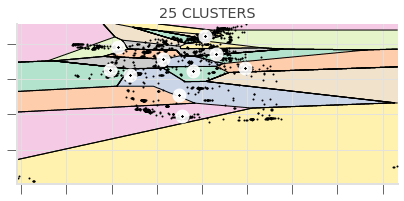

In [39]:
kmeans_final = KMeans(n_clusters=25, init="random", n_init=1, max_iter=30,
                      random_state=5)
kmeans_final.fit(XKmeans)

plt.figure(figsize=(15, 10))
plt.subplot(321)
plot_decision_boundaries(kmeans_final, XKmeans, show_centroids=False,
                         show_ylabels=False, show_xlabels=False)
plot_centroids(kmeans_iter1.cluster_centers_)
plt.title("25 CLUSTERS")

In [31]:
# Encuentra las latitudes y longitudes de los almacenes
dfCoordinates = pd.DataFrame(kmeans_final.cluster_centers_, columns=['lat', 'long'])
dfCoordinates["Coordinates"] = list(zip(dfCoordinates.long, dfCoordinates.lat))
dfCoordinates["Coordinates"] = dfCoordinates["Coordinates"].apply(Point)
dfCoordinates = gpd.GeoDataFrame(dfCoordinates, geometry="Coordinates")

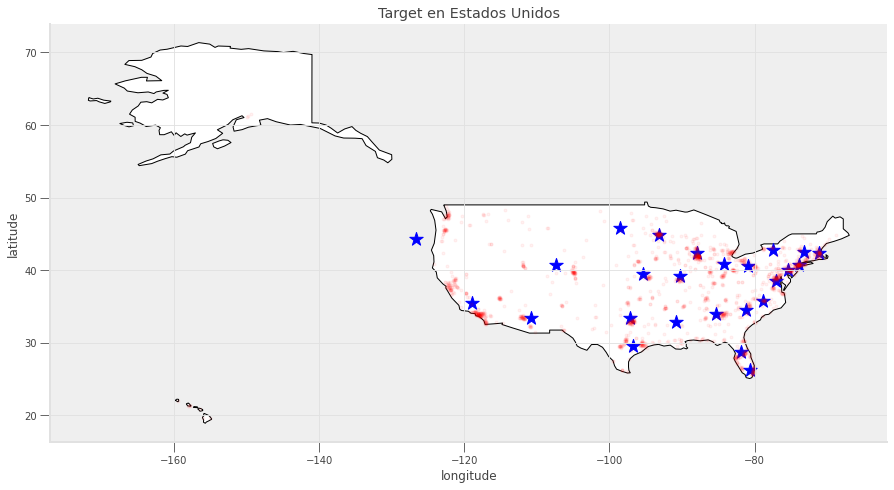

In [44]:
fig, gax = plt.subplots(figsize=(15,10))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


dfCoordinates.plot(ax=gax, color='blue', marker = "*", markersize = 200)
gdf.plot(ax=gax, color='red', alpha = 0.05, marker= ".")

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Se puede observar que existe un punto marcado como almacen fuera de tierra firme, por lo que es necesario ajustar el modelo para tener un rango de coordenadas en las que se pueden construir los almacenes

¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

<BarContainer object of 25 artists>

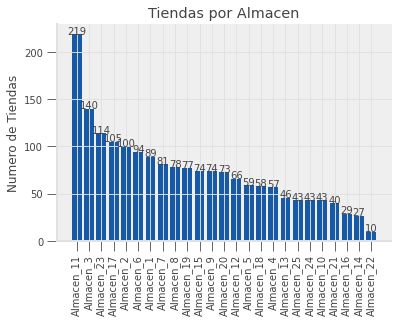

In [33]:
columnsKm = np.arange(1, 26, 1)
columnsKm.sort()
distancesKm = pd.DataFrame(kmeans_final.transform(XKmeans).round(2), columns=columnsKm)
distancesKm = pd.DataFrame({'Almacen': distancesKm.idxmin(axis=1), 'Distance': distancesKm.min(axis=1)})
yax = distancesKm['Almacen'].value_counts().values
xax = ['Almacen_' + str(x) for x in np.array(distancesKm['Almacen'].value_counts().index)]
plt.title('Tiendas por Almacen')
plt.ylabel('Numero de Tiendas')
for i in range(len(xax)):
    plt.text(i, yax[i], yax[i], ha = 'center')
plt.xticks(rotation = 90)
plt.bar(xax, yax)

In [34]:
#En el grafico anterior observamos el numero de tiendas a la que cada almacen va a abastecer. En el dataframe podremos observar a que distancia estara.

distancesKm.loc[distancesKm['Almacen'] == 22]

,Almacen,Distance
931,22,2.06
1275,22,2.50
1276,22,1.94
1277,22,2.51
1278,22,3.70
1481,22,0.36
1482,22,5.00
1483,22,1.68
1484,22,2.87
1485,22,2.92


¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.
R= El número de almacenes se obtuvo con la gráfica de Elbow que indica en que numero de clusters la partición empieza a no ser significativa para el promedio de las distancias al centro del grupo.
Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?
R= geográficos, matplolib y seaborn, además de las librerías para encontrar nuestros modelos óptimos y convertir datos.

¿Consideras importante que se grafique en un mapa?, ¿por qué?
R= Para este caso de K-Mean es muy importante graficar un mapa, para poder observar la distribución de las tiendas así como también se observa como nuestras predicciones pueden ser erróneas para el caso, por ejemplo el almacén que no está en una coordenada con tierra firme. Fue importante poder observar visualmente esta información y ayudo a tomar decisiones importantes.

Agrega las conclusiones
El método k-Medias es un método no jerárquico basado en centroides, robusto y fácil de implementar, en donde se requiere especificar previamente el número de grupos que se van a generar y a los cuales se van a asignar los datos.
Su finalidad es revelar concentraciones en los datos (casos o variables) para su agrupamiento eficiente en clusters (o conglomerados) según su homogeneidad.
